In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

In [4]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import joblib
from tqdm.notebook import tqdm

In [6]:
df = pd.read_pickle('df_done_sub.pkl')
df.describe()

,objID,ra,dec,z,zErr,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
count,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06,5.217631e+06
mean,1.237665e+18,1.710552e+02,2.404881e+01,6.179296e-01,5.671936e-02,2.222951e+01,2.107534e+01,2.026060e+01,1.968676e+01,1.932152e+01,2.122398e+01,2.039360e+01,1.960392e+01,1.902241e+01,1.864604e+01
std,8.414704e+12,9.492361e+01,1.939404e+01,7.788245e-01,1.818402e+01,3.108556e+01,2.883164e+01,1.720999e+00,1.918211e+01,2.284047e+01,3.109087e+01,2.883211e+01,1.847401e+00,1.969087e+01,2.284985e+01
min,1.237646e+18,9.090791e-05,-1.970271e+01,-1.154793e-02,-6.000000e+00,-9.999000e+03,-9.999000e+03,8.449972e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,1.056004e+01,-9.999000e+03,-9.999000e+03
25%,1.237658e+18,1.248184e+02,6.134379e+00,6.411032e-02,2.541620e-05,2.097722e+01,1.974922e+01,1.905372e+01,1.869493e+01,1.839120e+01,1.983894e+01,1.884519e+01,1.805490e+01,1.768769e+01,1.744911e+01
50%,1.237664e+18,1.731370e+02,2.350671e+01,4.425825e-01,9.605294e-05,2.247771e+01,2.139635e+01,2.059567e+01,2.006217e+01,1.966333e+01,2.113304e+01,2.092971e+01,2.009480e+01,1.942037e+01,1.899042e+01
75%,1.237668e+18,2.255236e+02,3.919907e+01,7.439512e-01,2.107767e-04,2.386316e+01,2.273537e+01,2.153313e+01,2.080460e+01,2.035205e+01,2.244827e+01,2.195380e+01,2.101648e+01,2.036773e+01,1.986122e+01
max,1.237681e+18,3.599999e+02,8.485214e+01,7.051930e+00,3.068822e+04,3.192045e+01,3.032868e+01,2.971638e+01,2.995165e+01,2.748061e+01,3.428534e+01,3.330923e+01,3.088891e+01,3.268382e+01,3.119199e+01


In [7]:
df[df['class']=='STAR']['subClass'].value_counts()

F9                127103
F5                105298
F3/F5V (30743)    102933
F                  77208
A0                 71331
M5                 49389
M4                 38154
K3                 34239
K1                 32136
G2                 31603
K5                 29338
M1                 27938
WD1                27386
G0                 26674
M                  24081
M3                 23063
A                  23043
K3V (32147)        21233
F8                 20002
K7                 19901
G                  19517
A12                18985
M2                 18880
C                  16522
K                  16438
OB                 16354
M0                 15919
G8                 15619
WD                 14947
K0                 14750
K5Ve (118100)      13943
LT                  9743
Name: subClass, dtype: int64

In [8]:
df3 = df.copy()
labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
df.replace({'class':labels}, inplace = True)
df.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237671256908628119,71.158077,21.333093,0.000127,0.000007,1,K3,18.60245,16.39218,15.41919,15.02712,14.80693,18.56369,16.39435,15.41744,15.03489,14.80436
1,1237662224090988683,245.087060,21.761936,-0.000114,0.000021,1,WD1,17.05462,17.11506,17.52513,17.79336,18.08322,17.04298,17.10623,17.50796,17.80872,18.10710
2,1237678439696957925,31.079203,3.429988,0.600258,0.000121,2,NaN,24.68714,22.30432,20.88555,19.98248,19.67558,24.76204,21.75368,20.48914,19.52968,19.21125
3,1237658205035823360,144.343990,42.530499,3.204911,0.000755,3,NaN,24.69678,21.42912,21.20449,21.01514,21.40008,24.90437,21.41079,21.20130,21.02791,21.41992
4,1237667113333817747,142.735950,25.753559,2.302619,0.000296,3,BROADLINE,21.99980,21.40259,21.57071,21.51316,20.84446,21.94518,21.32935,21.49114,21.23290,20.86414


In [9]:
df2 = df3.copy()
labels = {'STAR':0, 'GALAXY':1, 'QSO':1}
df2.replace({'class':labels}, inplace = True)
df2.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237671256908628119,71.158077,21.333093,0.000127,0.000007,0,K3,18.60245,16.39218,15.41919,15.02712,14.80693,18.56369,16.39435,15.41744,15.03489,14.80436
1,1237662224090988683,245.087060,21.761936,-0.000114,0.000021,0,WD1,17.05462,17.11506,17.52513,17.79336,18.08322,17.04298,17.10623,17.50796,17.80872,18.10710
2,1237678439696957925,31.079203,3.429988,0.600258,0.000121,1,NaN,24.68714,22.30432,20.88555,19.98248,19.67558,24.76204,21.75368,20.48914,19.52968,19.21125
3,1237658205035823360,144.343990,42.530499,3.204911,0.000755,1,NaN,24.69678,21.42912,21.20449,21.01514,21.40008,24.90437,21.41079,21.20130,21.02791,21.41992
4,1237667113333817747,142.735950,25.753559,2.302619,0.000296,1,BROADLINE,21.99980,21.40259,21.57071,21.51316,20.84446,21.94518,21.32935,21.49114,21.23290,20.86414


In [10]:
df = df.sort_values(by='cModelMag_r') #надо ли 
df.head()  

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
3485413,1237661001056845889,156.85147,41.638954,0.364095,0.000102,2,NaN,17.14206,17.57845,17.73233,18.68621,17.40770,10.48924,10.43573,10.56004,11.62111,10.30533
4220713,1237661001056845889,156.85147,41.638954,0.290089,0.000045,2,NaN,17.14206,17.57845,17.73233,18.68621,17.40770,10.48924,10.43573,10.56004,11.62111,10.30533
2278661,1237661974938976281,190.48903,6.850845,-0.000051,0.000524,1,WD,17.50879,18.56535,18.63430,19.23723,19.02882,10.20505,10.71276,10.84706,11.03211,10.64249
751942,1237661948639772687,175.24482,11.471141,0.003304,0.000008,2,BROADLINE,17.75602,16.17859,15.55491,15.16904,14.55951,12.90137,11.70385,11.03817,10.66695,10.37867
1607931,1237663203863035998,51.70502,-0.007240,-0.000004,0.000025,1,K5,21.05164,20.39033,18.83824,18.56721,18.00602,14.23634,13.96546,11.05246,10.99057,10.27308


In [126]:
X = df.drop(['class','subClass', 'objID'], axis = 1).values
y = df['class'].values
X.shape

(5217631, 14)

In [127]:
X2 = df2.drop(['class','subClass', 'objID'], axis = 1).values
y2 = df2['class'].values
X2.shape

(5217631, 14)

In [237]:
def g(mas):
    for i in range(len(mas)):
        for j in range(mas.shape[1]):
            if mas[i, j]:
                return i, j
    return -1
    

In [264]:
def data_preparation(X, y, binary=True):
    if binary:
        ind1 = np.random.choice((y==0).sum(), size=1100000, replace=False)
        ind3 = np.random.choice((y==1).sum(), size=1100000, replace=False)

        X1_train, X1_test, y1_train, y1_test = train_test_split(X[y==0][ind1], y[y==0][ind1], test_size = 0.8, random_state = 43)
        X3_train, X3_test, y3_train, y3_test = train_test_split(X[y==1][ind3], y[y==1][ind3], test_size = 0.8, random_state = 43)

        X_train, X_test = np.concatenate((X1_train, X3_train)), np.concatenate((X1_test, X3_test))
        y_train, y_test = np.concatenate((y1_train, y3_train)), np.concatenate((y1_test, y3_test))

    else:
        ind1 = np.random.choice((y==1).sum(), size=1000000, replace=False)
        ind2 = np.random.choice((y==2).sum(), size=1000000, replace=False)
        ind3 = np.random.choice((y==3).sum(), size=1000000, replace=False)
        #print(X[y==1].shape, len(y[y==2][ind2]), np.sum(y[y==2][ind2]))
        #print((X[y==2][ind2] == X[y==1][ind1][23], g((X[y==2][ind2] == X[y==1][ind1][23])))
        X_train, X_test, y_train, y_test = train_test_split(np.concatenate((X[y==1][ind1], X[y==2][ind2], X[y==3][ind3])), np.concatenate((y[y==1][ind1], y[y==2][ind2], y[y==3][ind3])), test_size = 0.9999, random_state = 42)
        #print(X_train[23])
        #print(X_test)
        #print(X_train[23] in X_test)
        '''
        X2_train, X2_test, y2_train, y2_test = train_test_split(X[y==2][ind2], y[y==2][ind2], test_size = 0.9999, random_state = 42)
        X3_train, X3_test, y3_train, y3_test = train_test_split(X[y==3][ind3], y[y==3][ind3], test_size = 0.9999, random_state = 42)
        X_train, X_test = np.concatenate((X1_train, X2_train, X3_train)), np.concatenate((X1_test, X2_test, X3_test))
        y_train, y_test = np.concatenate((y1_train, y2_train, y3_train)), np.concatenate((y1_test, y2_test, y3_test))
        '''
    X_test_not_scaling = X_test.copy()

    robust = RobustScaler()

    X_train = robust.fit_transform(X_train)
    X_test = robust.transform(X_test)

    return X_train, X_test, y_train, y_test, X_test_not_scaling, ind1, ind3

In [251]:
X_train, X_test, y_train, y_test, X_test_not_scaling, ind1, ind3 = data_preparation(X, y, binary=False)

(1103670, 14) 1000000 2000000
[ 3.4180345e+02  2.2441620e+01 -5.1585990e-04  7.4367590e-05
  2.0809340e+01  2.0194110e+01  1.9709480e+01  1.9535050e+01
  1.9508610e+01  2.0736590e+01  2.0163880e+01  1.9691970e+01
  1.9557170e+01  1.9526350e+01]
True


In [265]:
for i in range(len(X[y==2][ind2])):
    if (X[y==1][ind1][23] == X[y==2][ind2][i]).sum() == 14:
        print(i)
print(-1)

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


KeyboardInterrupt: 

In [243]:
g((X[y==2][ind2] == X[y==1][ind1][23]))

(16496, 8)

In [249]:
X[y==1][ind1].shape

(1000000, 14)

In [244]:
X[y==1][ind1][23]

array([ 3.1880588e+02,  5.6507300e-01, -5.3175480e-04,  3.0150170e-05,
        1.9657870e+01,  1.8469080e+01,  1.7976320e+01,  1.7799590e+01,
        1.7675940e+01,  1.9640150e+01,  1.8446460e+01,  1.7968120e+01,
        1.7782220e+01,  1.7683940e+01])

In [245]:
X[y==2][ind2][16496]

array([1.6338060e+02, 4.9500619e+01, 1.4379400e-01, 2.5829880e-05,
       2.1268520e+01, 1.9408010e+01, 1.8361690e+01, 1.8028890e+01,
       1.7675940e+01, 2.0538010e+01, 1.8562020e+01, 1.7594590e+01,
       1.7221430e+01, 1.6914800e+01])

In [161]:
s = 0
for i in range(len(X_train)):
    s+= X_train[i] i.+61n X_test
    print(s)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231


KeyboardInterrupt: 

True

In [176]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(300, 14) (2999700, 14) (300,) (2999700,)


In [131]:
X2_train, X2_test, y2_train, y2_test, X2_test_not_scaling = data_preparation(X2, y2)

In [132]:
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(440000, 14) (1760000, 14) (440000,) (1760000,)


In [133]:
#переменные для разделения выборки по признаку cModelMag_r:
n = 30
m = X_test[:,11].min()
N = (X_test[:,11].max() - m) / n

def print_plot(ml, X_test, y_test, X_test_not_scaling):
    #функция построения графика зависимости метрик классификации от r
    m = X_test_not_scaling[:,11].min()
    N = (X_test_not_scaling[:,11].max() - m) / n
    precision = []
    recall = []
    f1 = []
    r_mean = []
    y_pred_all = ml.predict(X_test)

    for i in range(0, n):
        indx = (X_test_not_scaling[:,11] >= (m + N * i)) & (X_test_not_scaling[:,11] <= (m + N * (i + 1))) #создаем выборку с необходимым нам диапазоном r
        if len(y_test[indx]) > 100 and X_test[indx].shape[0] > 1000:    #не будем брать слишком маленькие выборки
            h = classification_report(y_test[indx], y_pred_all[indx], output_dict=True, zero_division=0)
            precision.append(h['1']['precision'])
            recall.append(h['1']['recall'])
            f1.append(h['1']['f1-score'])
            r_mean.append(X_test_not_scaling[indx][:,11].mean())
            
    plt.figure(figsize = (5,4))
    plt.title('Зависимость precision от признкака cModelMag_r:')
    plt.plot(r_mean, precision, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость recall от признкака cModelMag_r:')
    plt.plot(r_mean, recall, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость f1 от признкака cModelMag_r:')
    plt.plot(r_mean, f1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    #indx = df['cModelMag_r'] < 15
    #indx1 = df['cModelMag_r'] < 18 & df['cModelMag_r'] > 16
    #return classification_report(y[indx], y_pred_all[indx], output_dict=True, zero_division=0)['1']['precision'], 

In [134]:
def roc(model, X_test, y_test, lab):
    from sklearn.metrics import roc_curve
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=lab)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()

In [262]:
import time
t = time.time()
rf = RandomForestClassifier()#n_estimators=200, random_state=42, max_features=5, min_samples_leaf=1) 
rf.fit(X_train, y_train)
#rf = joblib.load('rf.pkl')
y_pred = rf.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)
print(t - time.time())

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99    999905
           2       0.94      0.97      0.96    999909
           3       0.98      0.94      0.96    999886

    accuracy                           0.97   2999700
   macro avg       0.97      0.97      0.97   2999700
weighted avg       0.97      0.97      0.97   2999700

Confusion Matrix: 
 [[999905      0      0]
 [  9239 971943  18727]
 [   869  62458 936559]]
Training Score:  1.0
Testing Score:  0.9695659565956596
-34.06858944892883


In [137]:
joblib.dump(rf, 'rf_new.pkl')

['rf_new.pkl']

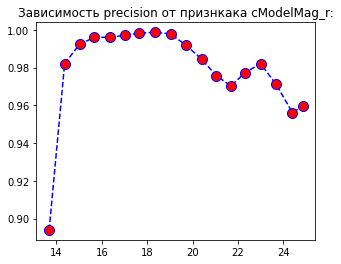

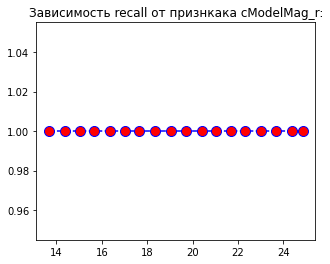

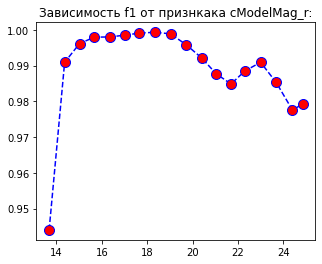

In [272]:
print_plot(rf, X_test, y_test, X_test_not_scaling)

In [269]:
lr = LogisticRegression(C = 1545, max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97    999905
           2       0.92      0.92      0.92    999909
           3       0.93      0.94      0.94    999886

    accuracy                           0.94   2999700
   macro avg       0.94      0.94      0.94   2999700
weighted avg       0.94      0.94      0.94   2999700

Confusion Matrix: 
 [[967357  17942  14606]
 [ 30099 917742  52068]
 [  3921  56910 939055]]
Training Score:  1.0
Testing Score:  0.9414788145481214


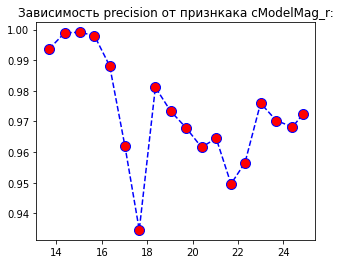

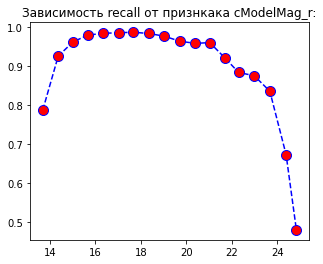

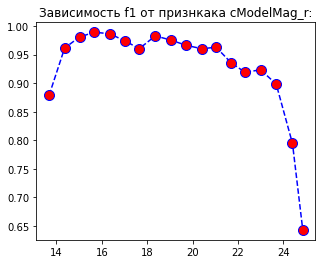

In [271]:
print_plot(lr, X_test, y_test, X_test_not_scaling)

In [ ]:
index = (df['cModelMag_r'] < 22.5) & (df['cModelMag_r'] > 21)
X_rf, y_rf = X[index], y[index]

sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(x=df[index]['class'], palette='magma')

ind1 = np.random.choice(len(y2[y2==0]), size=1100000, replace=False)
ind3 = np.random.choice(len(y2[y2==1]), size=1100000, replace=False)

X1_train, X1_test, y1_train, y1_test = train_test_split(X2[y2==0][ind1], y2[y2==0][ind1], test_size = 0.8, random_state = 43)
X3_train, X3_test, y3_train, y3_test = train_test_split(X2[y2==1][ind3], y2[y2==1][ind3], test_size = 0.8, random_state = 43)

X2_train, X2_test = np.concatenate((X1_train, X3_train)), np.concatenate((X1_test, X3_test))
y2_train, y2_test = np.concatenate((y1_train, y3_train)), np.concatenate((y1_test, y3_test))

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.3, random_state = 43)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)